<a href="https://colab.research.google.com/github/Ashish-Tripathy/ComputerVision/blob/master/Asg_4_DNN_2nd_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Architectural Highlights of this Iteration
1. For the 2nd iteration, we will start reducing the complexity of the algorithm to get similar accuracy with parameters under 15k. Reducing the complexity will also help in reducing the overfitting.
2. Major changes in this iteration will be changing the number of filters across the convolution blocks to make it leaner and reduce the parameters
3. The model might also benefit from introducing Batch normalisation layer just before prediction layer. Batch normalisation will standardize the features extracted or input channels to be passed to the prediction layer

# **Import Libraries and modules**

In [0]:

import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


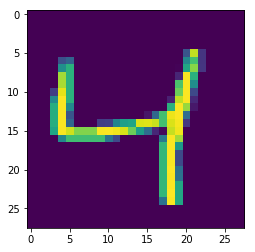

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Building the Architecture



In [0]:
from keras.models import Model
from keras.layers import Input,Conv2D, BatchNormalization,Activation, Flatten

input = Input(shape=(28, 28, 1,))

#defining convolution block
def conv_block(inputs, filters,padding = 'valid'):
  conv = Conv2D(filters = filters, kernel_size = (3,3), padding=padding, use_bias=False)(inputs)
  conv = Activation('relu')(conv)
  return conv

#defining transition block
def bottleneck(inputs,filters):
  conv = Conv2D(filters = filters, kernel_size = (1,1), padding = 'valid', use_bias = False)(inputs)
  conv = Activation('relu')(conv)
  return MaxPooling2D()(conv)

#Building the architecture
First_Layer  =  conv_block(input, 8) #26; RF 3x3
Second_Layer =  conv_block(First_Layer,12) #24; RF 5x5
Third_Layer  =  conv_block(Second_Layer,16) #22; RF 5x5
Transition_1 =  bottleneck(Third_Layer,12) #11; RF 7x7
Fourth_Layer =  conv_block(Transition_1,16) #9; RF 14x14
Fifth_Layer =  conv_block(Fourth_Layer,32)  #7; RF 16x16 
last1x1      =  Conv2D(filters = 10, kernel_size = (1,1), padding = 'valid', use_bias = False)(Fifth_Layer)
last1x1      =  Activation('relu')(last1x1)
last_layer   =  Conv2D(filters = 10, kernel_size = (7,7), padding = 'valid', use_bias = False)(last1x1) #1; RF 22x22

last_layer   =  BatchNormalization()(last_layer) #adding bacth normalisation

flatten      =  Flatten()(last_layer)
output       =  Activation('softmax')(flatten)

#creating the model
model = Model(inputs=[input], outputs=[output])
model.summary()





Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        864       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        1728      
_________________________________________________________________
acti

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.callbacks import *

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch = 20, verbose = 1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.3661 - acc: 0.9398 - val_loss: 0.1249 - val_acc: 0.9800
Epoch 2/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.1454 - acc: 0.9716 - val_loss: 0.0565 - val_acc: 0.9868
Epoch 3/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.0989 - acc: 0.9786 - val_loss: 0.0460 - val_acc: 0.9905
Epoch 4/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0785 - acc: 0.9819 - val_loss: 0.0360 - val_acc: 0.9897
Epoch 5/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0639 - acc: 0.9845 - val_loss: 0.0479 - val_acc: 0.9861
Epoch 6/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.0529 - acc: 0.9876 - val_loss: 0.0389 - val_acc: 0.9899
Epoch 7/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0476 - acc: 0.9883 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.02591065772450529, 0.9922]


# Observations
1. <b>Best Validation Accuracy: 99.26% at 14th Epoch; Parameters: 14.45k; </b>
2. Even with reduced complexity, we are able to achieve almost same accuracy than the vanilla network within 20 epochs where we had achieved 99.32 at 19th epoch. If run for more epochs we could have hoped to beat the accuracy acieved by vanilla network as well.
2. With reduced complexity, the model seems to learn slowly initially underfitting more comapred to previous iteration for 1st and 2nd epoch. For next epochs learning is slow compared to previous iteration but overfitting is much reduced due to reduced complexity and little regularisation introduced by a single Batch normalisation layer
3. Just adding Batch normalisation before the prediction layer helped me get better accuracy with much less epochs for the same architecture. Now I am thinking of using Batch Normalisation after every convolution in the architecture to achieve better accuracy with 20 epochs.